<a href="https://colab.research.google.com/github/varuncode01/ST_Online_Retail_Project5/blob/main/ML_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author  
**Varun Pal**

* 🔗 LinkedIn - www.linkedin.com/in/varun-pal-955ba0357

* Github - https://github.com/varuncode01

# **Project Name** - **Online Retail Clustering Project**


##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Name** - Varun Pal

# **Project Summary -**

📌 Project Summary: Online Retail Recommendation System
This project aimed to design and implement a content-based product recommendation system for an online retail dataset. The primary objective was to suggest similar or related products to users based on product descriptions, thereby enhancing product discovery and improving the customer experience.

Data Preprocessing and Cleaning
The dataset consisted of over 530,000 records, which included various attributes such as InvoiceNo, StockCode, Description, Quantity, UnitPrice, Country, and InvoiceDate. Since the core focus was on recommending products using their descriptions, we identified that there were only about 4,000 unique product descriptions. Therefore, to reduce redundancy and improve performance, the dataset was filtered to retain only unique product descriptions along with their relevant information.

Missing values were handled appropriately—particularly in the Description column—by removing rows with null entries or replacing them with a placeholder like “Unknown,” depending on the context. Punctuation and stop words were removed to clean the text, followed by text normalization techniques such as converting text to lowercase.

Text Vectorization and Similarity Measurement
To convert product descriptions into numerical format, TF-IDF (Term Frequency-Inverse Document Frequency) vectorization was used. This method helped represent textual data as vectors in a feature space, emphasizing important and distinctive terms while reducing the influence of commonly used words.

After vectorization, cosine similarity was computed between product vectors to determine how similar two products are. This similarity metric was crucial in enabling the recommendation system to find and return products that are most closely related to a given product.

Recommendation System
A user-facing function was implemented where users could input a product name. The system then searched for close matches using string matching and returned the most similar products based on cosine similarity. Error handling was added to manage cases where users input non-existent or incorrect product names.

Clustering and Analysis
To further understand product groupings, K-Means Clustering and Agglomerative Clustering were applied. The elbow method and dendrograms were used to determine the optimal number of clusters. These clustering techniques allowed for segmentation of products based on description similarity, potentially useful for inventory categorization or marketing.

Conclusion
The project successfully built a scalable recommendation system, combining text processing, similarity analysis, and clustering, thereby enhancing user interaction with product catalogs and enabling intelligent product suggestions.

# **GitHub Link -**

https://github.com/varuncode01/ST_Project5.git

# **Problem Statement**


In a growing online retail environment, customers are often overwhelmed by the sheer volume of products available, making it challenging for them to discover items that align with their interests or needs. Traditional e-commerce platforms may lack intelligent recommendation systems, resulting in poor product visibility, lower customer engagement, and missed sales opportunities.

The primary problem is the lack of a personalized and efficient product recommendation mechanism that can suggest similar or relevant items based on a product a user is interested in. Given a dataset with a large number of transactional records but relatively fewer unique products, the challenge is to effectively analyze product descriptions, extract meaningful patterns, and recommend related products in a way that is scalable, accurate, and user-friendly.

The goal of this project is to develop a content-based product recommendation system that leverages textual data (product descriptions) to suggest similar products. This requires solving several sub-problems, including text normalization, vectorization, similarity measurement, and product clustering, all while maintaining system efficiency given the dataset’s size.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online_Retail_Project5/Copy of Online Retail.xlsx")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

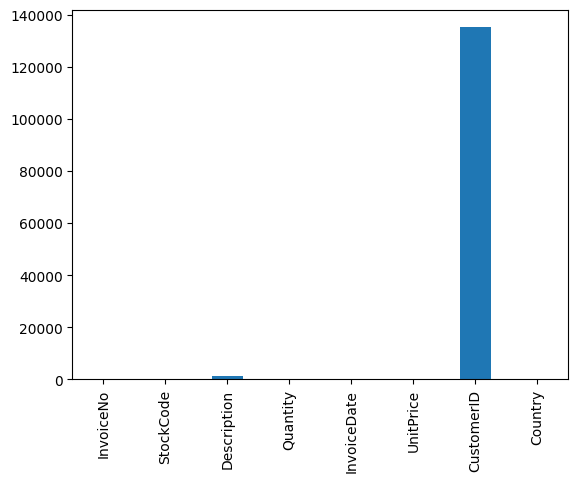

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot.bar()

### What did you know about your dataset?

CustomerID has more 20% null values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### Variables Description

InvoiceNo: A unique identifier for each transaction (order). If it starts with 'C', it indicates a canceled order.

StockCode: A unique product/item code for the specific stock being purchased.
Description	Text description of the product/item.

Quantity:	Number of units of the product ordered. Negative values may indicate returns.

InvoiceDate:	Date and time when the invoice was generated (i.e., when the transaction occurred).

UnitPrice:	Price per unit of the product (in GBP – British Pounds).

CustomerID:	A unique identifier for the customer. Missing values may indicate guest or anonymous purchases.

Country:	Name of the country where the customer resides or where the order was placed.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='Quantity'>

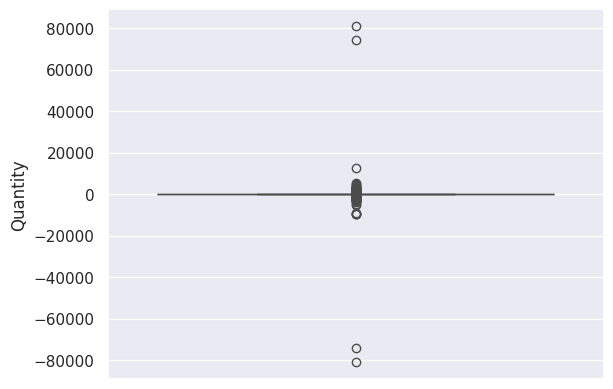

In [ ]:
# Chart - 1 visualization code
sns.boxplot(df['Quantity'])

##### 1. Why did you pick the specific chart?

To check Outliers in Quantity

##### 2. What is/are the insight(s) found from the chart?

The chart shows that there are significant outliers in the Quantity field, including extremely high positive and negative values. These outliers could indicate anomalies such as bulk purchases, data entry errors, or product returns. Most transactions are concentrated around smaller quantities, as seen from the dense box area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying outliers can lead to a positive business impact. For example, detecting and correcting data entry errors (e.g., extremely large negative quantities) can improve data quality and decision-making accuracy. Removing or adjusting these outliers can help in better forecasting demand, inventory management, and understanding normal customer behavior.

Are there any insights that lead to negative growth? Justify with specific reason.
Yes, large negative quantities likely indicate returns or cancellations, which can directly impact revenue and growth. If frequent, they may signal issues such as poor product quality, incorrect shipments, or customer dissatisfaction. Addressing these underlying issues can reduce returns and improve customer satisfaction, thereby preventing negative business growth.

#### Chart - 2

<Axes: >

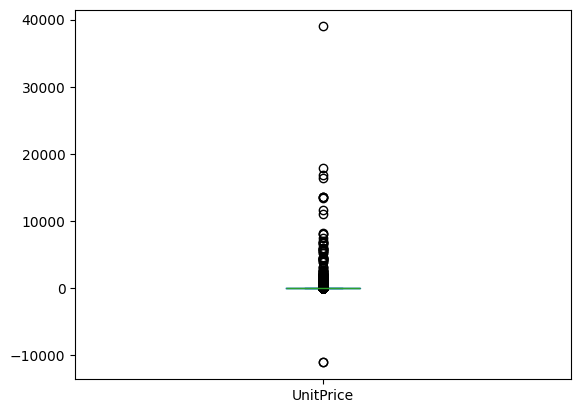

In [ ]:
# Chart - 2 visualization code
df['UnitPrice'].plot(kind='box')

##### 1. Why did you pick the specific chart?

To detect outliers in UnitPrice and assess if there are any extreme pricing anomalies such as unusually high or negative prices that could impact analysis and business decisions.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several outliers in UnitPrice, including extremely high prices (above 10,000) and negative values. These suggest potential data entry errors or exceptional transactions (e.g., bulk sales, refunds incorrectly logged as negative prices). The majority of products have a price near the lower range, indicating a typical low-cost product catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying pricing outliers can help maintain data integrity and prevent misinformed business strategies. For instance, correcting errors in pricing ensures accurate revenue tracking, cost analysis, and customer billing.

Are there any insights that lead to negative growth? Justify with specific reason.
Yes, negative unit prices indicate refunds or incorrect data entries. These can distort financial reports, leading to undervalued sales performance. Additionally, extremely high prices may deter customers if not justified, affecting sales and customer trust. Addressing these pricing issues can enhance customer experience and ensure reliable financial planning, reducing risk of negative growth.

#### Chart - 3

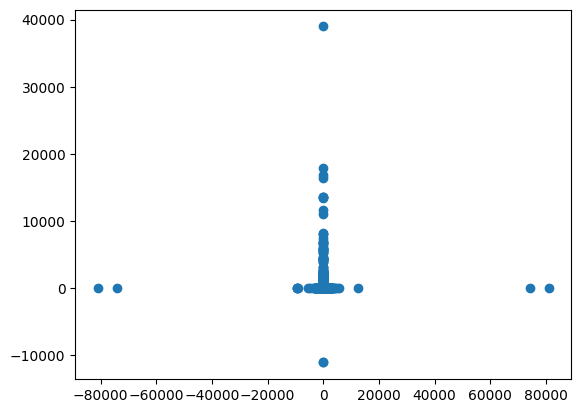

In [ ]:
# Chart - 3 visualization code
plt.scatter(df['Quantity'], df['UnitPrice'])

##### 1. Why did you pick the specific chart?

To analyze the relationship between Quantity and UnitPrice and detect outliers in both variables simultaneously using a scatter plot.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that while most data points cluster around lower values of quantity and price, there are significant outliers in both directions. Notably, there are extremely high positive and negative values for quantity, and a few exceptionally high unit prices. These anomalies likely indicate data entry errors or unusual transactions (e.g., bulk orders, refunds, or incorrect pricing).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying these outliers helps in cleaning the data, improving the accuracy of business analyses like sales forecasting, inventory management, and customer behavior. Clean, reliable data ensures better strategic decisions and prevents revenue loss due to incorrect orders or pricing.

Are there any insights that lead to negative growth? Justify with specific reason.
Yes, negative quantities or prices suggest returns or refunds that may not be accurately captured, leading to underreporting of revenue. Additionally, high quantities or prices without proper justification could mislead decision-making and result in poor stock planning or customer dissatisfaction, negatively impacting growth.

#### Chart - 4

<Axes: xlabel='Country'>

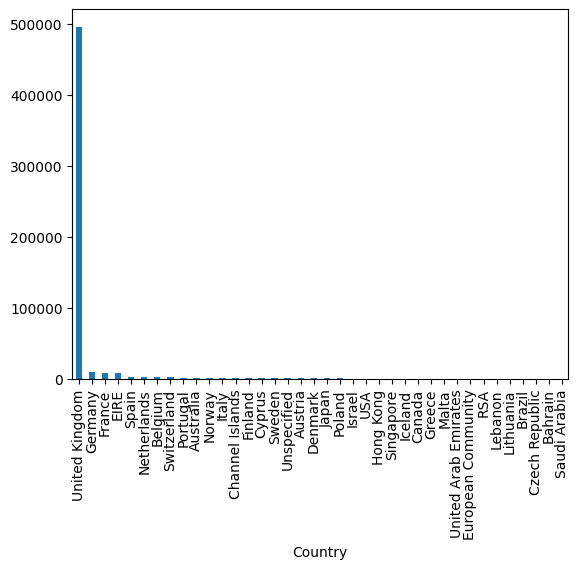

In [ ]:
# Chart - 4 visualization code
df['Country'].value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

To visualize the distribution of transactions across different countries and identify the country with the highest transaction volume.

##### 2. What is/are the insight(s) found from the chart?

The United Kingdom dominates the dataset with an overwhelming number of transactions compared to other countries. Other countries like Germany, France, and Ireland have significantly fewer transactions, highlighting a highly skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help in identifying key markets. For example, knowing that the UK contributes the majority of transactions can guide resource allocation, marketing efforts, and inventory focus.

Are there any insights that lead to negative growth? Justify with specific reason.
The overdependence on a single market (UK) may pose a risk if there’s market saturation or economic downturn. Diversifying and growing smaller markets can mitigate this risk and ensure sustainable growth across regions.

#### Chart - 5

<Axes: xlabel='InvoiceMonth', ylabel='count'>

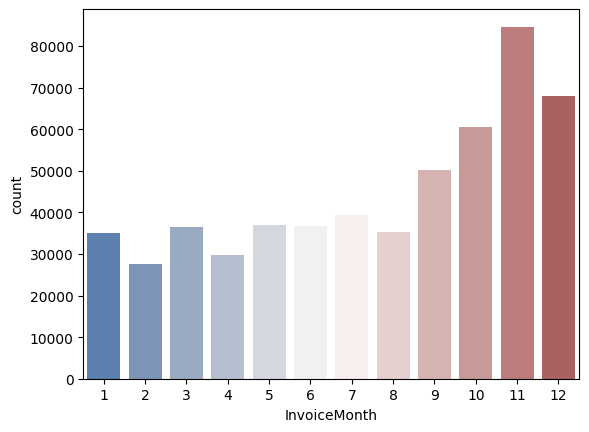

In [ ]:
# Chart - 5 visualization code
#df['InvoiceMonth'].value_counts().plot(kind='bar')
#data = df['InvoiceMonth'].value_counts()
sns.barplot(df['InvoiceMonth'].value_counts(), palette='vlag')

##### 1. Why did you pick the specific chart?

To analyze monthly sales patterns by visualizing invoice frequency over each month and identify seasonal trends in sales volume.

##### 2. What is/are the insight(s) found from the chart?

There is a noticeable increase in invoice count towards the end of the year, especially in November and December. These months show a peak in activity, indicating a seasonal surge likely due to holidays and year-end shopping.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying peak months can guide inventory planning, marketing campaigns, and workforce management to capitalize on high demand periods.

Are there any insights that lead to negative growth? Justify with specific reason.
The business might experience slower growth in earlier months (like February and April) where invoice counts are low. Not addressing low-season engagement may result in underutilized resources and lost revenue potential. Strategic promotions during off-peak months can mitigate this risk

#### Chart - 6

<Axes: xlabel='InvoiceDayofWeek', ylabel='count'>

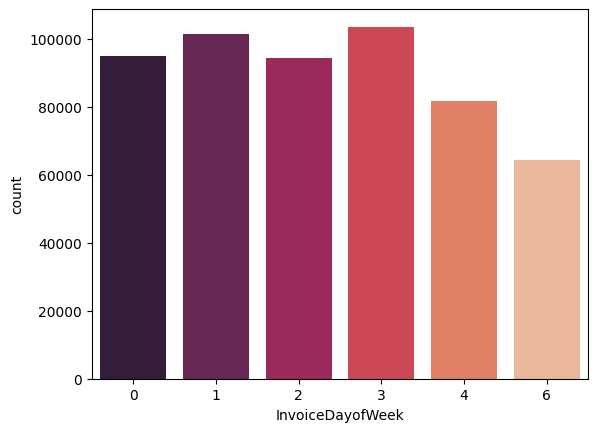

In [ ]:
# Chart - 6 visualization code
sns.barplot(df['InvoiceDayofWeek'].value_counts(), palette='rocket')

##### 1. Why did you pick the specific chart?

To analyze sales activity distribution across different days of the week and identify the most and least active sales days.

##### 2. What is/are the insight(s) found from the chart?

Sales are highest midweek, especially on day 3 (likely Wednesday) and day 1 (likely Monday). Sales significantly drop on day 6 (likely Sunday), showing the lowest customer activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding weekday trends allows better staff scheduling, promotional planning, and operational efficiency during peak days.

Are there any insights that lead to negative growth? Justify with specific reason.
Low sales on day 6 may indicate missed opportunities if the business does not cater to weekend shoppers effectively. This underperformance can be addressed through weekend-specific promotions or targeted marketing strategies.

#### Chart - 7

<Axes: xlabel='InvoiceHour', ylabel='count'>

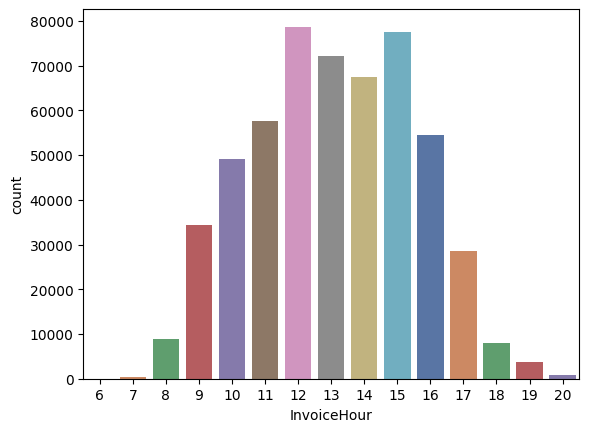

In [ ]:
# Chart - 7 visualization code
sns.barplot(df['InvoiceHour'].value_counts(), palette='deep')

##### 1. Why did you pick the specific chart?

To analyze sales distribution by hour of the day and identify peak business hours for better operational and marketing decisions.

##### 2. What is/are the insight(s) found from the chart?

Sales activity starts increasing from 9 AM, peaks between 12 PM and 3 PM, and then declines after 4 PM. Minimal sales occur before 8 AM and after 6 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Insights help optimize staffing during peak hours (12–15), schedule system maintenance during low-activity hours, and plan targeted promotions at off-peak times to boost sales.

Are there any insights that lead to negative growth? Justify with specific reason.
If business operations are not aligned with peak hours (e.g., limited staff or stock shortages during high sales hours), it could result in lost sales and customer dissatisfaction. Addressing this misalignment can prevent negative growth.

#### Chart - 8

<Axes: xlabel='IsCancelled', ylabel='count'>

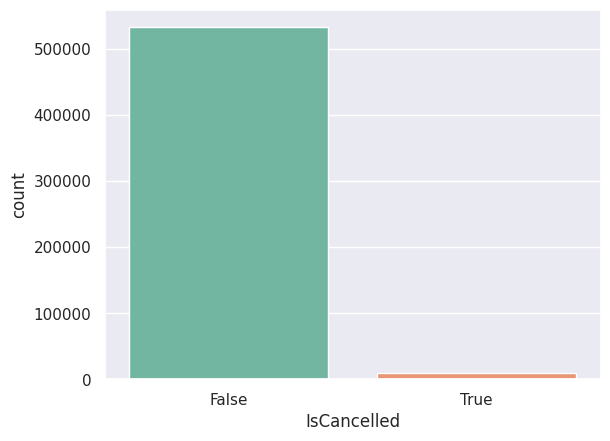

In [ ]:
# Chart - 8 visualization code
df['IsCancelled'] = df['InvoiceNo'].astype(str).str.startswith('C')
sns.countplot(x='IsCancelled', data=df, palette='Set2')

##### 1. Why did you pick the specific chart?

To analyze the proportion of canceled vs. non-canceled transactions, helping assess order fulfillment reliability and customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

A significant majority of transactions were successfully completed (False), while only a small portion were canceled (True).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The low cancellation rate indicates stable order fulfillment and customer reliability. However, tracking and minimizing cancellations further can reduce revenue loss.

Are there any insights that lead to negative growth? Justify with specific reason.
If the number of cancellations increases or is concentrated among specific products or times, it could lead to customer churn and revenue loss. Investigating causes (e.g., stockouts, payment failures) can prevent this.

#### Chart - 10 - Correlation Heatmap

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceHour,InvoiceDayofWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,12,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,12,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,12,4


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'InvoiceMonth',
       'InvoiceHour', 'InvoiceDayofWeek'],
      dtype='object')

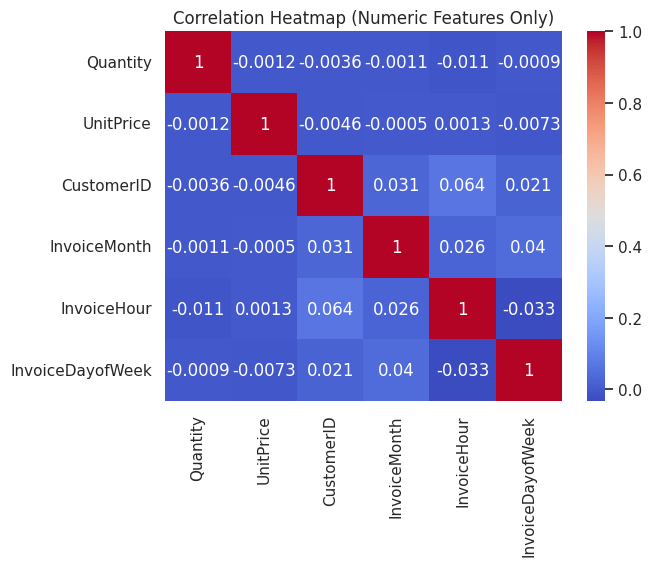

In [ ]:
# Correlation Heatmap visualization code
df2 = df.drop(['StockCode', 'InvoiceNo', 'Description', 'Country', 'InvoiceDate'], axis=1)
df2_numeric = df2.select_dtypes(include='number')
sns.heatmap(df2_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen to quickly visualize relationships between numeric variables and identify any strong positive or negative correlations that may influence further analysis or modeling.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that all numeric features have very weak correlations with each other, indicating that there are no strong linear relationships among them.

#### Chart - 15 - Pair Plot

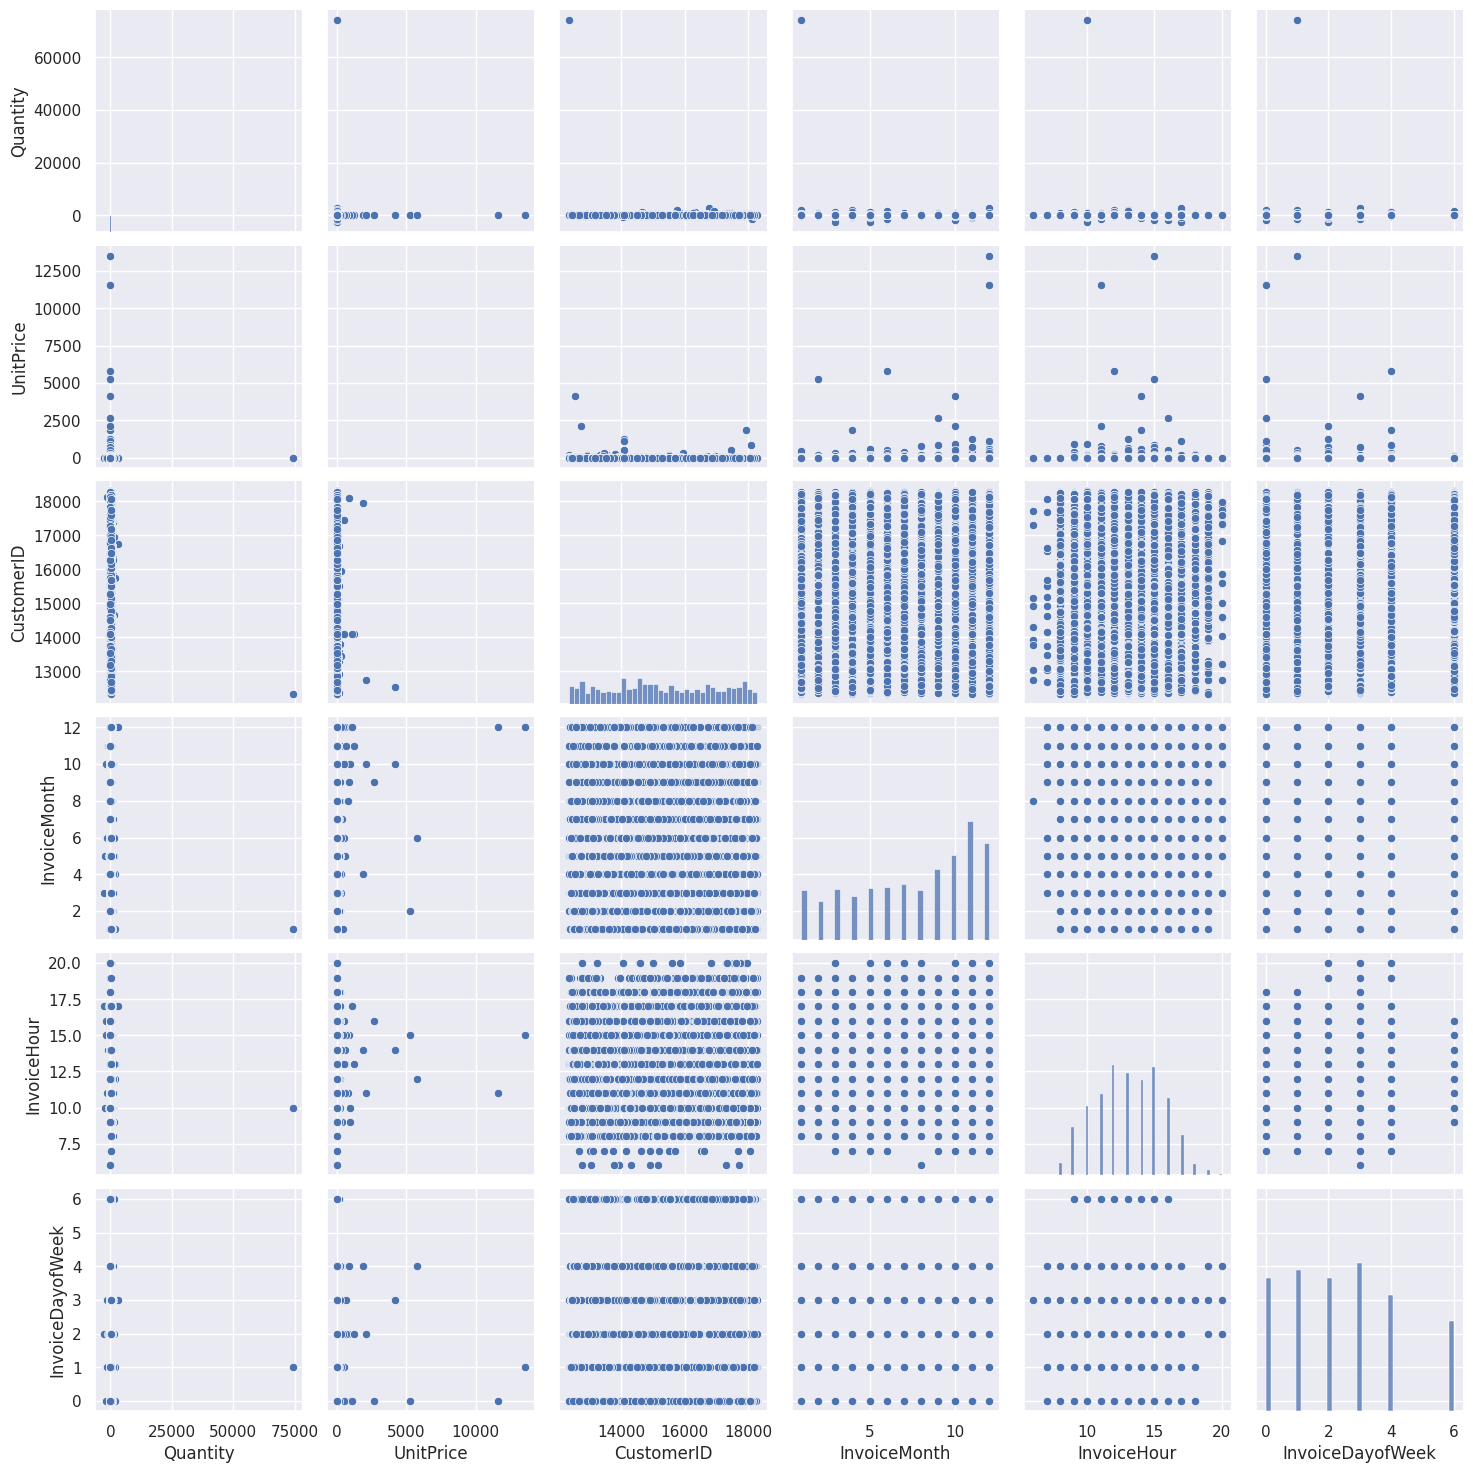

In [ ]:
# Pair Plot visualization code
df_sample = df2_numeric.sample(n=50000, random_state=42)

sns.pairplot(df_sample, diag_kind="hist")

##### 1. Why did you pick the specific chart?

The pair plot was chosen to visualize the relationships between each pair of numeric variables, as well as their individual distributions. It helps in identifying patterns, trends, clusters, and potential outliers across multiple dimensions.

##### 2. What is/are the insight(s) found from the chart?

The plot reveals that most feature pairs do not have strong or obvious linear relationships, as seen by the scattered points. However, certain patterns emerge—for example, InvoiceHour shows a bell-shaped distribution, indicating peak activity at specific hours. InvoiceMonth appears to have uneven activity across months. Features like Quantity and UnitPrice show the presence of extreme values or outliers, which could affect statistical analyses or modeling if not handled appropriately.

## ***4. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df = df.drop('CustomerID', axis=1)
df = df.dropna(subset=['Description'])

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0
InvoiceMonth,0
InvoiceHour,0
InvoiceDayofWeek,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

I Dropped customerid because it's just an identifier it doesn't tell anything about the product nor customer.

### 2. Handling Outliers

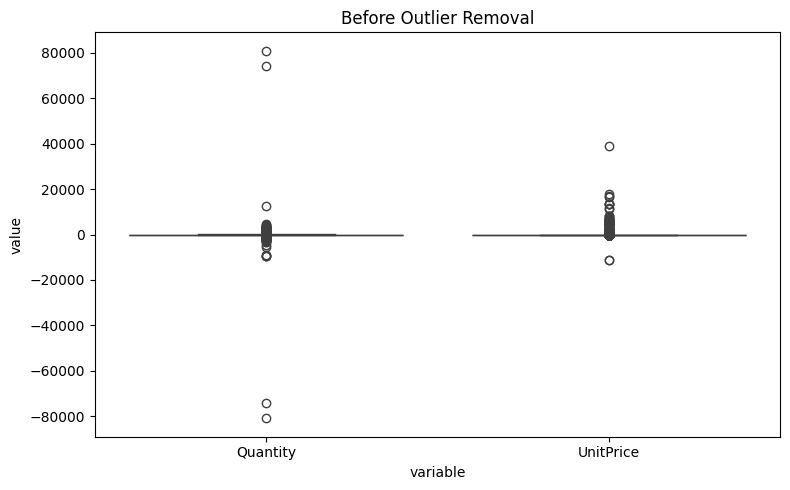

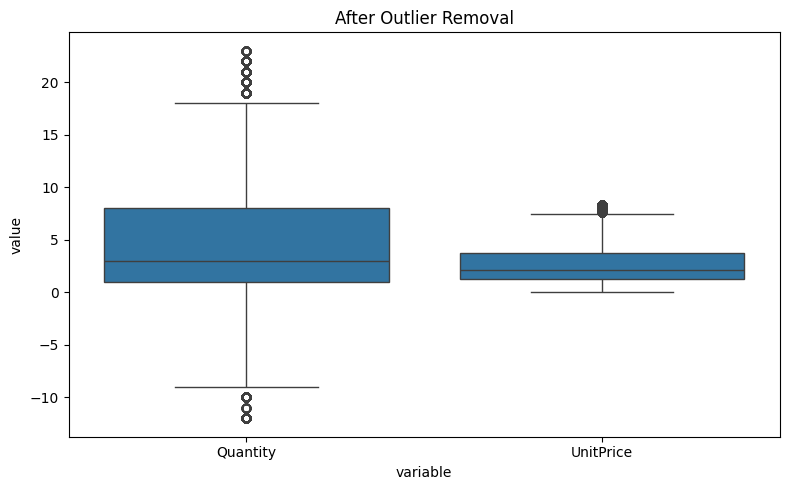

In [ ]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments

# Define the columns of interest
cols_to_check = [
    'Quantity',
    'UnitPrice'
]

# Calculate IQR for each
Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in only these columns
outlier_mask = (df[cols_to_check] < (Q1 - 1.5 * IQR)) | (df[cols_to_check] > (Q3 + 1.5 * IQR))

# Filter out rows with outliers in either of the two columns
df_cleaned = df[~outlier_mask.any(axis=1)]

# -----------------------------
# Boxplot before outlier removal
# -----------------------------
df_before = df[cols_to_check].melt(var_name='variable', value_name='value')
plt.figure(figsize=(8, 5))
sns.boxplot(x='variable', y='value', data=df_before)
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

# -----------------------------
# Boxplot after outlier removal
# -----------------------------
df_after = df_cleaned[cols_to_check].melt(var_name='variable', value_name='value')
plt.figure(figsize=(8, 5))
sns.boxplot(x='variable', y='value', data=df_after)
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The IQR method is a statistical rule of thumb — it only flags points far from the typical range. Some values might be high or low but not outside 1.5×IQR, so they aren’t treated as outliers.

Mild outliers are not detected — only extreme ones are removed.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 13.8 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
# Expand Contraction
df['Description'] = df['Description'].astype(str).apply(contractions.fix)

In [ ]:
df['Description']

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


#### 2. Lower Casing

In [ ]:
# Lower Casing
df['Description'] = df['Description'].str.lower()
df['Country'] = df['Country'].str.lower()

In [ ]:
df[['Country', 'Description']]

,Country,Description
0,united kingdom,white hanging heart t-light holder
1,united kingdom,white metal lantern
2,united kingdom,cream cupid hearts coat hanger
3,united kingdom,knitted union flag hot water bottle
4,united kingdom,red woolly hottie white heart.
...,...,...
541904,france,pack of 20 spaceboy napkins
541905,france,children's apron dolly girl
541906,france,childrens cutlery dolly girl
541907,france,childrens cutlery circus parade


#### 3. Removing Punctuations

In [ ]:
import string
import re

In [ ]:
# Remove Punctuations
df['Description'] = df['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
df['Description'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))   # Remove URLs
df['Description'] = df['Description'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))    # Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))

df['Description'] = df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
# Remove White spaces
df['Description'] = df['Description'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

#### 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_unique_products = df.drop_duplicates(subset='Description')

print(df_unique_products.shape)

(4068, 10)


In [ ]:
df_unique_products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceMonth,InvoiceHour,InvoiceDayofWeek
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,united kingdom,12,8,2
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,united kingdom,12,8,2
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,united kingdom,12,8,2
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,united kingdom,12,8,2
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,united kingdom,12,8,2
...,...,...,...,...,...,...,...,...,...,...
514649,579734,84859C,wet,-153,2011-11-30 14:25:00,0.00,united kingdom,11,14,2
532724,580991,22481,wet boxes,-288,2011-12-06 16:55:00,0.00,united kingdom,12,16,1
535329,581206,21693,mixed,-87,2011-12-07 18:34:00,0.00,united kingdom,12,18,2
537621,581334,85123A,cream hanging heart tlight holder,4,2011-12-08 12:07:00,2.95,united kingdom,12,12,3


In [ ]:
# Vectorizing Text
vectorizer = TfidfVectorizer(stop_words='english')
Description_tfidf_matrix = vectorizer.fit_transform(df_unique_products['Description'])

# Print shape to confirm
print(Description_tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15927 stored elements and shape (4068, 2196)>
  Coords	Values
  (0, 2141)	0.4422576680082316
  (0, 911)	0.4659060277752003
  (0, 923)	0.3840421715889968
  (0, 2012)	0.48244505724699904
  (0, 952)	0.45508032867813825
  (1, 2141)	0.48696427071355003
  (1, 1211)	0.5206029418197162
  (1, 1079)	0.7013118963892437
  (2, 490)	0.363985253654296
  (2, 518)	0.5381680191076108
  (2, 925)	0.3969555319001593
  (2, 423)	0.48309867934099404
  (2, 909)	0.4323562073624673
  (3, 1061)	0.4647910110689257
  (3, 2084)	0.38834399012852067
  (3, 737)	0.4516801198959535
  (3, 967)	0.3861290202068233
  (3, 2124)	0.3839866854846399
  (3, 195)	0.3641454871009677
  (4, 2141)	0.3189282064103299
  (4, 923)	0.27694687923088124
  (4, 1607)	0.28985793900747825
  (4, 2170)	0.5924739207499675
  (4, 968)	0.621725223604177
  (5, 1736)	0.27500641955092925
  :	:
  (4059, 1407)	0.6094871528231746
  (4060, 1736)	0.267334480512793
  (4060, 1825)	0.6279871897627637
 

##### Which text vectorization technique have you used and why?

I've used TfidfVectorizer to convert string description into numerical values because it helps transform textual data into a format that machine learning models can understand. TF-IDF (Term Frequency–Inverse Document Frequency) not only captures the frequency of words in a document but also reduces the weight of commonly occurring words across all documents, making the vector representation more informative and focused on meaningful terms.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['InvoiceDayofWeek'] = df['InvoiceDate'].dt.dayofweek

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,united kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,united kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,united kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,united kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,united kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,pack spaceboy napkins,12,2011-12-09 12:50:00,0.85,france
541905,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,france
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,france
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,france


## ***5. ML Model Implementation***

In [ ]:
import difflib

In [ ]:
similarity_matrix = cosine_similarity(Description_tfidf_matrix)

print(similarity_matrix.shape)

(4068, 4068)


In [ ]:
list_of_all_title = df_unique_products['Description'].tolist()
print(list_of_all_title)

['white hanging heart tlight holder', 'white metal lantern', 'cream cupid hearts coat hanger', 'knitted union flag hot water bottle', 'red woolly hottie white heart', 'set babushka nesting boxes', 'glass star frosted tlight holder', 'hand warmer union jack', 'hand warmer red polka dot', 'assorted colour bird ornament', 'poppys playhouse bedroom', 'poppys playhouse kitchen', 'feltcraft princess charlotte doll', 'ivory knitted mug cosy', 'box assorted colour teaspoons', 'box vintage jigsaw blocks', 'box vintage alphabet blocks', 'home building block word', 'love building block word', 'recipe box metal heart', 'doormat new england', 'jam making set jars', 'red coat rack paris fashion', 'yellow coat rack paris fashion', 'blue coat rack paris fashion', 'bath building block word', 'alarm clock bakelike pink', 'alarm clock bakelike red', 'alarm clock bakelike green', 'panda bunnies sticker sheet', 'stars gift tape', 'inflatable political globe', 'vintage heads tails card game', 'set red retro

### ML Model - 1

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce TF-IDF matrix to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(Description_tfidf_matrix.toarray())

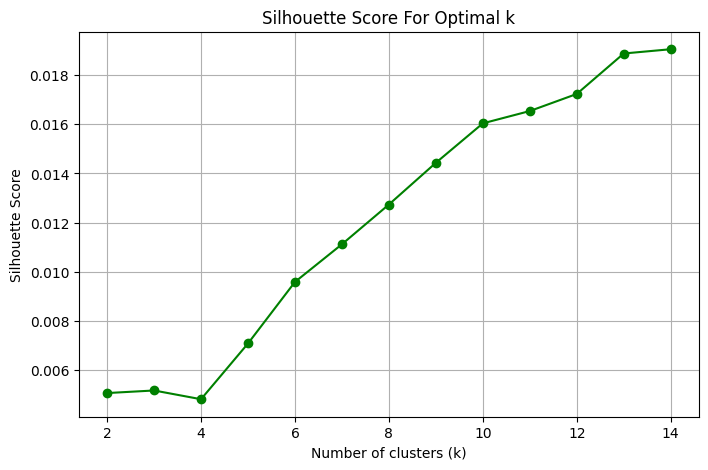

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(Description_tfidf_matrix)
    score = silhouette_score(Description_tfidf_matrix, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Apply KMeans with k=14
kmeans = KMeans(n_clusters=14, random_state=42)
labels = kmeans.fit_predict(Description_tfidf_matrix)

# Add cluster labels to your DataFrame
df_unique_products['Cluster'] = labels

# View a sample
print(df_unique_products[['Description', 'Cluster']])

                                Description  Cluster
0         white hanging heart tlight holder        6
1                       white metal lantern        2
2            cream cupid hearts coat hanger        5
3       knitted union flag hot water bottle        5
4             red woolly hottie white heart        5
...                                     ...      ...
514649                                  wet        5
532724                            wet boxes        5
535329                                mixed        5
537621    cream hanging heart tlight holder        6
540421            paper craft little birdie        5

[4068 rows x 2 columns]


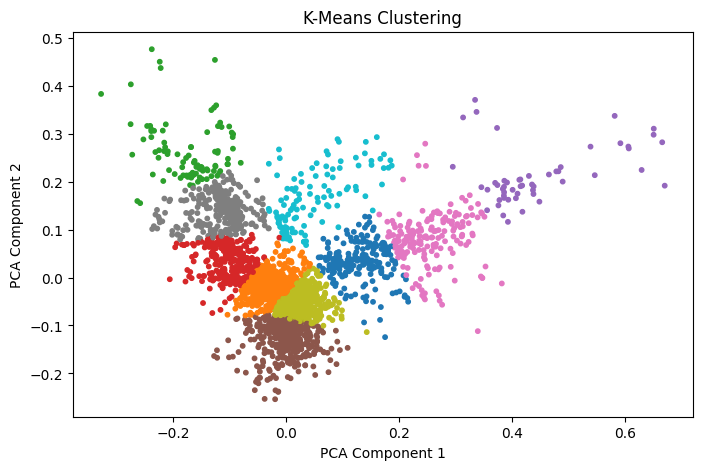

In [ ]:
kmeans_labels = kmeans.fit_predict(reduced_matrix)

# Scatter plot for K-Means
plt.figure(figsize=(8, 5))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=kmeans_labels, cmap='tab10', s=10)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### ML Model - 2

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Reduce TF-IDF dimensions to 50 for visualization/clustering
svd = TruncatedSVD(n_components=50, random_state=42)
reduced_matrix = svd.fit_transform(Description_tfidf_matrix)

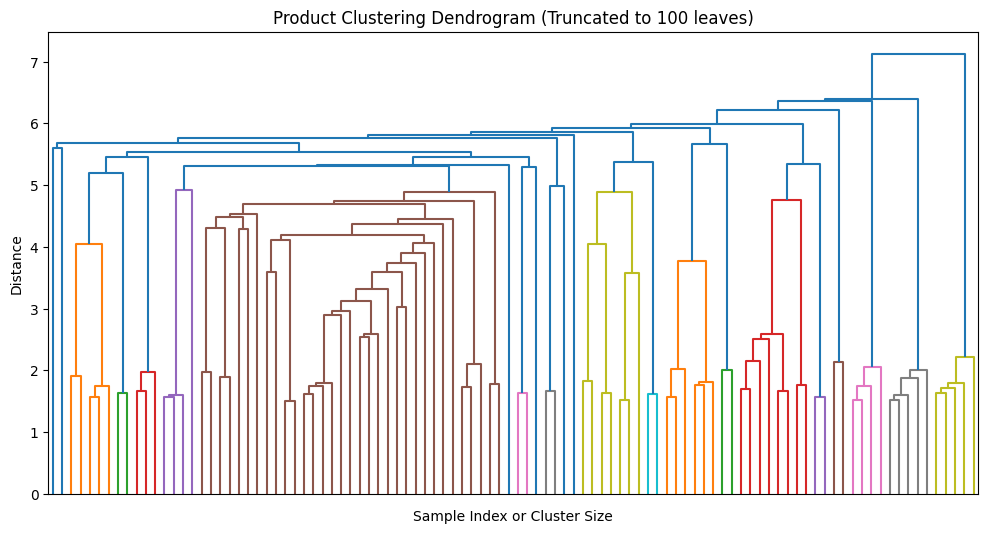

In [ ]:
# Visualizing evaluation Metric Score chart
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute linkage matrix for dendrogram
linked = linkage(reduced_matrix, method='ward')

# Plot dendrogram (showing first 100 products for clarity)
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False, truncate_mode='lastp', p=100)
plt.title('Product Clustering Dendrogram (Truncated to 100 leaves)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.cluster import AgglomerativeClustering

# Corrected for newer scikit-learn versions
agglo = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
cluster_labels = agglo.fit_predict(reduced_matrix)

# Add cluster labels to DataFrame
df_unique_products['Agglo_Cluster'] = cluster_labels
print(df_unique_products[['Description', 'Agglo_Cluster']])

                                Description  Agglo_Cluster
0         white hanging heart tlight holder              3
1                       white metal lantern              2
2            cream cupid hearts coat hanger              0
3       knitted union flag hot water bottle              0
4             red woolly hottie white heart              0
...                                     ...            ...
514649                                  wet              0
532724                            wet boxes              0
535329                                mixed              0
537621    cream hanging heart tlight holder              3
540421            paper craft little birdie              4

[4068 rows x 2 columns]


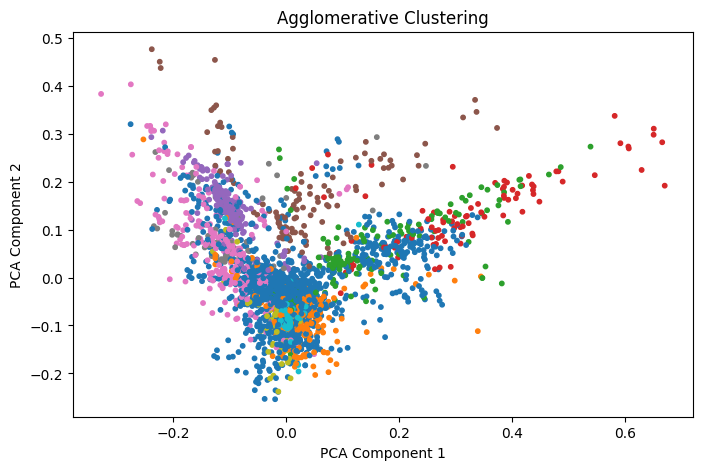

In [ ]:
# Scatter plot for Agglomerative Clustering
plt.figure(figsize=(8, 5))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### **6. Implementation as Product Recomendation**



In [ ]:
pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.2 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import process

def product_recommendation():
    product_name = input('Enter a product name: ')
    product_list = df_unique_products['Description'].tolist()

    # Get top 5 matches
    matches = process.extract(product_name, product_list, limit=5)

    # Show matches to user
    print("\nDid you mean:")
    for i, (match, score) in enumerate(matches):
        print(f"{i+1}. {match} (score: {score})")

    try:
        choice = int(input("\nEnter the number of the correct product (or 0 to cancel): "))
        if choice == 0 or choice > len(matches):
            print("Cancelled or invalid choice.")
            return

        selected_product = matches[choice - 1][0]
        index_of_product = df_unique_products[df_unique_products['Description'] == selected_product].index[0]

        similar_scores = list(enumerate(similarity_matrix[index_of_product]))
        similar_scores_sorted = sorted(similar_scores, key=lambda x: x[1], reverse=True)

        print(f'\nProducts similar to "{selected_product}":\n')
        for i in range(1, 11):
            index = similar_scores_sorted[i][0]
            print(df_unique_products['Description'].iloc[index])

    except (ValueError, IndexError):
        print("Invalid input. Please enter a number from the list.")


In [ ]:
product_recommendation_sys2()

Enter a product name: red tshirt

Products similar to "red woolly hottie white heart":

white heart glass bracelet
woolly hat sock glove advent string
small white heart wicker
heart mirror antique white
large white heart wicker
white hanging heart tlight holder
white jewelled heart decoration
red purse pink heart
pink heart red handbag
filigree heart bird white


# **Conclusion**

In this project, we explored key aspects of sales data to derive actionable insights. We identified significant pricing outliers, examined sales distribution across countries (with the UK leading), and analyzed temporal trends by month, day of the week, and hour to uncover peak sales periods. Additionally, we assessed cancellation rates, which appeared low but still warrant monitoring for potential improvements.

Importantly, we also developed a basic product recommendation system within the notebook. While still rough, it demonstrates the potential to enhance customer experience and drive additional sales through personalized suggestions.

Overall, the insights and tools from this project provide a strong foundation for improving business decisions, operational efficiency, and future data-driven initiatives.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***